# DATA QUALITY ASSESSTMENT

*“The importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”*

We are provided with 3 datasets:

* Customer Demographic 
* Customer Addresses
* Transactions data in the past 3 months

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TRANSACTIONS TABLE ANALYSIS

In [2]:
df=pd.read_excel("KPMG.xlsx",sheet_name="Transactions")

In [3]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
del df['Unnamed: 13']

In [5]:
del df['Unnamed: 14']

In [6]:
df = df.drop('Unnamed: 15', 1)

In [7]:
df.drop(['Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

In [8]:
df = df.drop(df.columns[[18, 19, 20]], axis=1)

In [9]:
df = df.drop(df.columns[[13, 14, 15]], axis=1)

In [10]:
df.drop(['Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

* **We can see that there are some missing values in the columns : 'online_order', 'brand', 'product_line ', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'**

* **We can also notice that the 'product_first_sold_date' column is of float datatype which has to be changed to date format.**

In [12]:
df["product_first_sold_date"]=pd.to_datetime(df["product_first_sold_date"]).dt.date

In [13]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [14]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [15]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [16]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [17]:
df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [18]:
df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [19]:
dup=df.duplicated()
df[dup].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

**We can see that there are many missing values in the data and that there are no duplicates. We might have to drop the missing values or fill those using suitable values, which we will do later if needed for furthur analysis.**

In [20]:
df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date        1
dtype: int64

online_order: [ 0.  1. nan]
blanks: 360


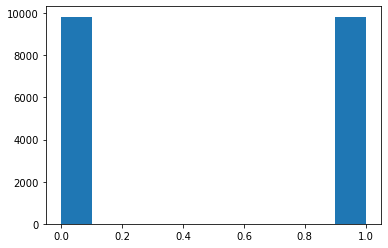

In [115]:
print('online_order:', df['online_order'].unique())
print('blanks:', pd.isna(df['online_order']).sum())
plt.hist(df['online_order'][pd.notna(df['online_order'])])
plt.show()

order_status: ['Approved' 'Cancelled']
blanks: 0


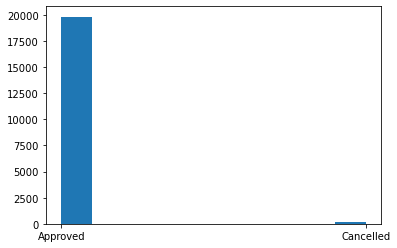

In [116]:
print('order_status:', df['order_status'].unique())
print('blanks:', pd.isna(df['order_status']).sum())
plt.hist(df['order_status'][pd.notna(df['order_status'])])
plt.show()

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
blanks: 197


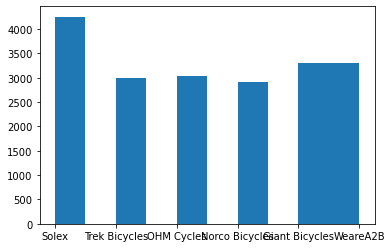

In [117]:
print('brand:', df['brand'].unique())
print('blanks:', pd.isna(df['brand']).sum())
plt.hist(df['brand'][pd.notna(df['brand'])])
plt.show()

product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
blanks: 197


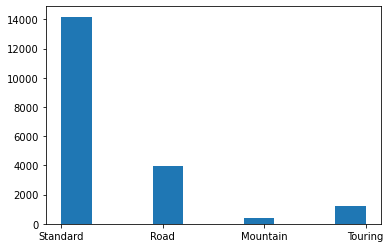

In [118]:
print('product_line:', df['product_line'].unique())
print('blanks:', pd.isna(df['product_line']).sum())
plt.hist(df['product_line'][pd.notna(df['product_line'])])
plt.show()

product_class: ['medium' 'low' 'high' nan]
blanks: 197


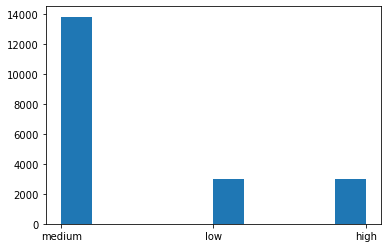

In [119]:
print('product_class:', df['product_class'].unique())
print('blanks:', pd.isna(df['product_class']).sum())
plt.hist(df['product_class'][pd.notna(df['product_class'])])
plt.show()

product_size: ['medium' 'large' 'small' nan]
blanks: 197


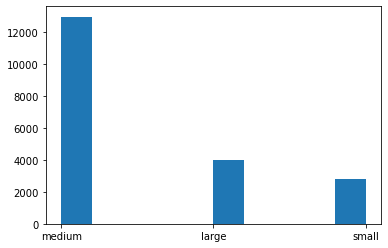

In [120]:
print('product_size:', df['product_size'].unique())
print('blanks:', pd.isna(df['product_size']).sum())
plt.hist(df['product_size'][pd.notna(df['product_size'])])
plt.show()

In [121]:
df['profit'] = df['list_price'] - df['standard_cost']
df['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

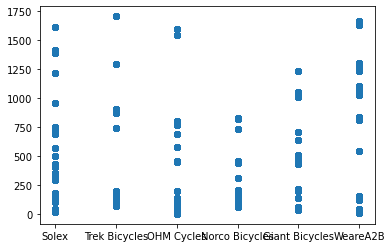

In [122]:
plt.scatter(df['brand'][pd.notna(df['brand'])], df['profit'][pd.notna(df['brand'])])

# NEW CUSTOMER LIST TABLE ANALYSIS

In [28]:
df1 = pd.read_excel("KPMG.xlsx",sheet_name="NewCustomerList")

In [29]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.61,0.7625,0.953125,0.810156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.93,0.9300,1.162500,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.54,0.6750,0.675000,0.675000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.01,1.0100,1.262500,1.262500,4,4,1.703125


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

**We find that the table data has some columns that are not necessaryy and they should be dropped : 'Unnamed: 16','Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'. We also notice that there are some missing values in the table**

In [31]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']

In [32]:
df1=df1.drop(cols,axis=1)

In [33]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [34]:
df1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [35]:
df1.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [36]:
df1.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

In [37]:
df1.duplicated().sum()

0

In [38]:
df1.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [39]:
df1['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [40]:
df1['gender'].str.replace('U','UnSpecified')

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
995      Male
996      Male
997    Female
998      Male
999      Male
Name: gender, Length: 1000, dtype: object

In [41]:
df1['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [42]:
df1['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [43]:
df1['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

# CUSTOMER DEMOGRAPHIC TABLE ANALYSIS

In [44]:
df2=pd.read_excel("KPMG.xlsx",sheet_name="CustomerDemographic")

In [45]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [47]:
cols = ['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']

In [48]:
df2=df2.drop(cols,axis=1)

In [49]:
cols = ['Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22']

In [50]:
df2=df2.drop(cols,axis=1)

In [51]:
cols = ['Unnamed: 23','Unnamed: 24','Unnamed: 25']

In [52]:
df2=df2.drop(cols,axis=1)

In [53]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [55]:
df2['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [56]:
df2=df2.drop('default',axis=1)

In [57]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [58]:
df2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [59]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [60]:
df2.duplicated().sum()

0

**We can see that the table consists of some missing values in certain columns : 'last_name', 'DOB', 'job_title', 
'job_industry_category', 'default', 'tenure'. There are no duplicate values. The default column seems to be unusual and should be checked in detail. The 'gender' column also seems to have inconsistent entires in it.** 

In [61]:
df2['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

**The 'default' column seems to have some random text entries in it. And it seems to serve no purpose so it can be dropped from the table. The 'gender' column has entries for male and female specifies by 4 values : 'Male', 'Female', 'M', 'F' and it also has an entry 'U' which means 'Unidentified'. So we will group these data and make them more consistent and correct.**

In [62]:
df2['gender']=df2['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','UnSpecified')

In [63]:
df2['gender'].value_counts()

Female         2039
Male           1873
UnSpecified      88
Name: gender, dtype: int64

In [64]:
df2.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [65]:
df2['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [66]:
df2['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [67]:
df2['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [68]:
df2['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

gender: ['Female' 'Male' 'UnSpecified' 'U']
blanks: 0


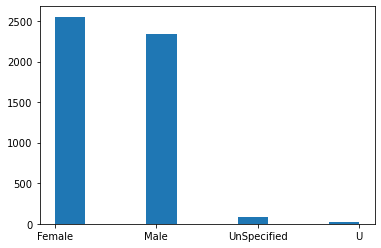

In [105]:
print('gender:', df2['gender'].unique())
print('blanks:', pd.isna(df2['gender']).sum())
plt.hist(df2['gender'][pd.notna(df2['gender'])])
plt.show()

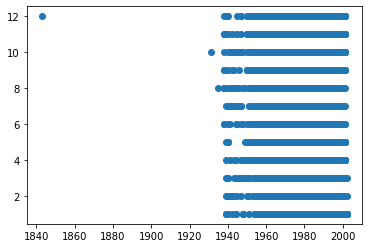

In [104]:
plt.scatter([d.year for d in df2['DOB']], [d.month for d in df2['DOB']])
plt.show()

In [107]:
from datetime import datetime
df2['age'] = (datetime.now() - df2['DOB']) // 365

In [108]:
df2['age'].describe()

count                           4896
mean      45 days 06:21:37.409587298
std       13 days 23:47:59.436816879
min       19 days 08:04:47.320949104
25%       34 days 17:27:58.005880610
50%       44 days 15:44:24.307250473
75%       55 days 13:08:34.170264172
max      177 days 15:54:16.088072391
Name: age, dtype: object

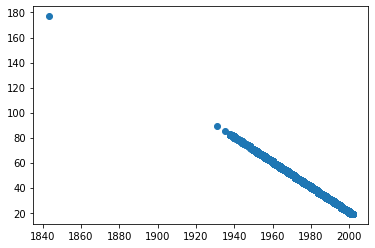

In [109]:
plt.scatter([d.year for d in df2['DOB']], df2['age'].dt.days)
plt.show()

wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


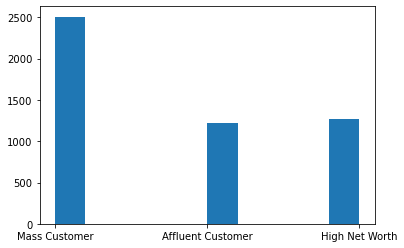

In [110]:
print('wealth_segment:', df2['wealth_segment'].unique())
print('blanks:', pd.isna(df2['wealth_segment']).sum())
plt.hist(df2['wealth_segment'][pd.notna(df2['wealth_segment'])])
plt.show()

deceased_indicator: ['N' 'Y']
blanks: 0


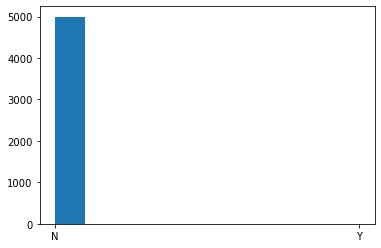

In [111]:
print('deceased_indicator:', df2['deceased_indicator'].unique())
print('blanks:', pd.isna(df2['deceased_indicator']).sum())
plt.hist(df2['deceased_indicator'][pd.notna(df2['deceased_indicator'])])
plt.show()

owns_car: ['Yes' 'No']
blanks: 0


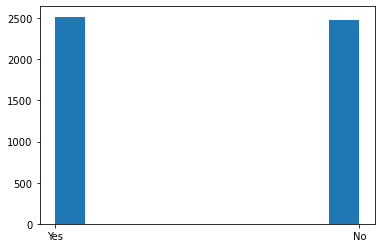

In [112]:
print('owns_car:', df2['owns_car'].unique())
print('blanks:', pd.isna(df2['owns_car']).sum())
plt.hist(df2['owns_car'][pd.notna(df2['owns_car'])])
plt.show()

# CUSTOMER ADDRESS TABLE ANALYSIS

In [69]:
cust_address = pd.read_excel("KPMG.xlsx",sheet_name="CustomerAddress")

In [70]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3999 non-null   int64  
 1   address             3999 non-null   object 
 2   postcode            3999 non-null   int64  
 3   state               3999 non-null   object 
 4   country             3999 non-null   object 
 5   property_valuation  3999 non-null   int64  
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
 16  Unname

In [72]:
cols = ['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10']

In [73]:
cust_address=cust_address.drop(cols,axis=1)

In [74]:
cols = ['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']

In [75]:
cust_address=cust_address.drop(cols,axis=1)

In [76]:
cols = ['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25']

In [77]:
cust_address=cust_address.drop(cols,axis=1)

In [78]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [80]:
cust_address.shape

(3999, 6)

In [79]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [81]:
cust_address.duplicated().sum()

0

In [82]:
cust_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [83]:
cust_address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

**The Customer Address Table is consisent and accurate. It contains no missing data as well as no duplicated data in it. The table seems to contain all the customer address information about customers in Australia**

**We can see that the 3 tables : the 'Customer Demographic' Table , the 'New Customer Lists' Table and the 'Customer Address' Table are relevant to each other, so it would be more meaningful to combine these tables and view them as one.**

state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
blanks: 0


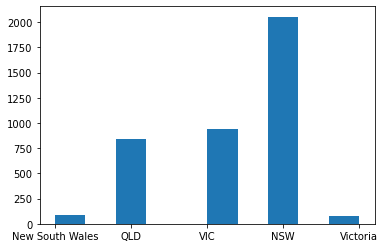

In [113]:
print('state:', cust_address['state'].unique())
print('blanks:', pd.isna(cust_address['state']).sum())
plt.hist(cust_address['state'][pd.notna(cust_address['state'])])
plt.show()

property_valuation blanks: 0


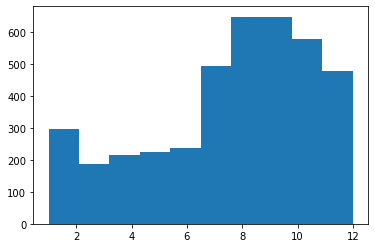

In [114]:
print('property_valuation blanks:', pd.isna(cust_address['property_valuation']).sum())
plt.hist(cust_address['property_valuation'], bins=10)
plt.show()

In [84]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [85]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [86]:
df2['customer_id'].iloc[-1]

4000

In [87]:
df1.insert(0, 'customer_id', range(4001, 4001 + len(df1)))

In [88]:
df2 = pd.merge(df2, cust_address, on='customer_id', how='left')

In [89]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [94]:
df1 = pd.concat([df2, df1], ignore_index=True, sort=False)

In [95]:
df2= df1

In [96]:
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,2 Sloan Way,2200.0,NSW,Australia,7.0,996.0,0.374
4996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,04 Union Crossing,2196.0,NSW,Australia,10.0,997.0,0.357
4997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,997.0,0.357
4998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19.0,57666 Victoria Way,4215.0,QLD,Australia,2.0,997.0,0.357


# CONCLUSION
**The given data is analysed and investigated in all aspects to inspect the Quality of data with respect to all qualities mentioned in the Data Quality Framework Table**

- Accuracy


- Completeness


- Uniqueness


- Validity


- Consistency


- Relevancy


- Timeliness